In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import scipy as sp
import matplotlib.pyplot as plt
from hexsilicon.swarm.algorithms.ACO import SACO
from hexsilicon.problem.problems.MinPathFunction import MinPathFunction
from hexsilicon.problem import domain, problem, restriction

In [2]:
hyperparams = {'n_ants': 7, 'n_iterations': 20, 'rho': 0.01, 'q': 1, 'pheromone_0': 0.1}
df = pd.DataFrame({'source': [1, 1, 1, 2, 2, 3, 3, 3, 4, 4, 5], 
                   'target': [2, 3, 6, 3, 7, 6, 7, 5, 5, 7, 6], 
                   'weight': [5, 3.1, 5.2, 4.9, 5.2, 3.2, 3, 6, 5.5, 4.8, 4.7]})
dict_restrictions = {'initial_point': 1, 'final_point': 4}
R = restriction.Restriction(dict_restrictions)
D = domain.Domain(df, R)
P = problem.Problem(D, MinPathFunction())
a = SACO(hyperparams, P)

In [3]:
a.generate_initial_swarm()
path = a.metaheuristic()

Best path: [1 2 7 4] with cost: 15.0
Best path: [1 3 7 4] with cost: 10.899999999999999


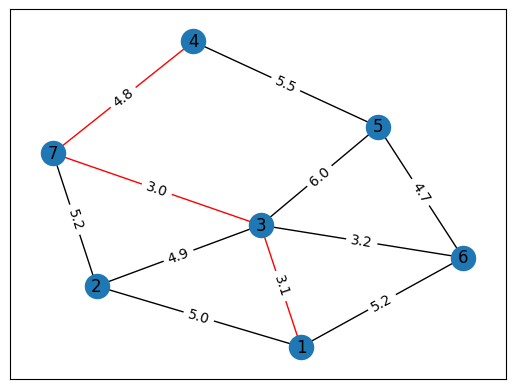

In [5]:
G = a.problem.representation
path_edges = list(zip(path, path[1:]))  

edge_colors = [
    "red" if edge in path_edges or tuple(reversed(edge)) in path_edges else "black"
    for edge in G.edges()
]

pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edges(G, pos, edge_color=edge_colors)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edge_labels(
    G, pos, edge_labels={(u, v): d["weight"] for u, v, d in G.edges(data=True)}
)
plt.show()